# 2. Basic Data Description and Preliminary Studies

## Import Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## Importing Data

In [135]:
cities = pd.read_csv("cities.csv")
cities.drop(cities.columns[0], axis=1)
cities["Date"] = pd.to_datetime(cities["Date"])

## 2.1 Statistical Descriptors of Selected Towns

## 2.2 Statistical Descriptors of Time Series

In [48]:
stat_desc = pd.DataFrame(
   ...:     {
   ...:         "Mean": [cities.MIA.mean(), cities.MSP.mean(), cities.LAS.mean()],
   ...:         "Minimum": [cities.MIA.min(), cities.MSP.min(), cities.LAS.min()],
   ...:         "Maximum": [cities.MIA.max(), cities.MSP.max(), cities.LAS.max()],
   ...:         "Standard deviation": [cities.MIA.std(), cities.MSP.std(), cities.LAS.std()],
   ...:         "Skewness": [cities.MIA.skew(), cities.MSP.skew(), cities.LAS.skew()],
   ...:         "Kurtosis": [cities.MIA.kurt(), cities.MSP.kurt(), cities.LAS.kurt()],
   ...:     }, index = ["Miami", "Minneapolis", "Las Vegas"]
   ...: )

In [49]:
stat_desc

,Mean,Minimum,Maximum,Standard deviation,Skewness,Kurtosis
Miami,235444.607362,140000.0,367750.0,57809.682745,0.182487,-0.834468
Minneapolis,226782.723926,153700.0,350000.0,45773.774035,0.726915,-0.172321
Las Vegas,224288.926380,128000.0,375000.0,65436.717808,0.270610,-0.981876


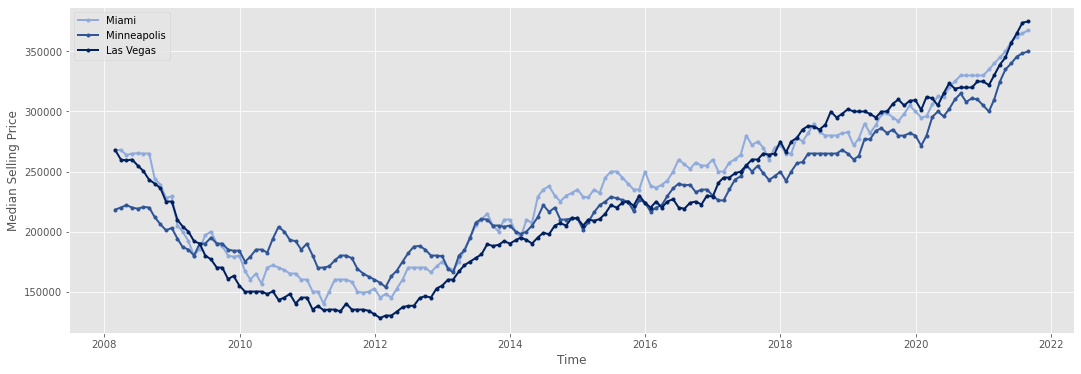

In [144]:
plt.style.use("ggplot")
plt.figure(figsize = (18, 6))
plt.xlabel('Time')
plt.ylabel('Median Selling Price')
plt.plot(cities.Date, cities.MIA, color="#8FAADC", marker=".", linewidth="2", label='Miami')
plt.plot(cities.Date, cities.MSP, color="#2F5597", marker=".", linewidth="2", label='Minneapolis')
plt.plot(cities.Date, cities.LAS, color="#002060", marker=".", linewidth="2", label='Las Vegas')
plt.legend()
plt.show()

## 2.3 Statistical Descriptors of COVID in those Cities

In [83]:
df = pd.read_csv("us-counties.csv", parse_dates=['date'])

In [84]:
# Function that returns the cases and deaths in defined time intervalls of a city
def special_city_data(state_name, city_name):
    df_temp = df.loc[(df['state'] == state_name) & (df["county"] == city_name)]
    # <- as the data is cumulative we have to compute the delta
    df_temp['cases'] = df_temp['cases'].diff().fillna(df_temp['cases'].iloc[0])
    df_temp['deaths'] = df_temp['deaths'].diff().fillna(
        df_temp['deaths'].iloc[0])
    df_temp = df_temp.resample('W', on='date').agg(
        {'cases': 'sum', 'deaths': 'sum'})  # <- "M" for monthly data. "W" for weekly data
    new_col = city_name
    df_temp.insert(0, 'county', new_col)
    name = "us-covid-data_" + city_name + ".csv"
    df_temp.to_csv(name, index=True)
    return

In [145]:
# Florida - Miami-Dade, Nevada - Clark, Minnesota - Heenepin + Ramsay
state_name = "Nevada"
city_name = "Clark"
special_city_data(state_name, city_name)
state_name = "Florida"
city_name = "Miami-Dade"
special_city_data(state_name, city_name)
state_name = "California"
city_name = "San Francisco"
special_city_data(state_name, city_name)

<ipython-input-84-c8570fd1ccb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cases'] = df_temp['cases'].diff().fillna(df_temp['cases'].iloc[0])
<ipython-input-84-c8570fd1ccb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['deaths'] = df_temp['deaths'].diff().fillna(


### SPECIAL CASE

In [86]:
# Minneapolis --> special case as we combine the "Twin-cities" Mineapolis and St. Paul
df_hennepin = df.loc[(df['state'] == "Minnesota") &
                     (df["county"] == "Hennepin")]
df_hennepin['cases'] = df_hennepin['cases'].diff().fillna(
    df_hennepin['cases'].iloc[0])
df_hennepin['deaths'] = df_hennepin['deaths'].diff().fillna(
    df_hennepin['deaths'].iloc[0])
df_hennepin = df_hennepin.resample('W', on='date').agg(
    {'cases': 'sum', 'deaths': 'sum'})


df_ramsey = df.loc[(df['state'] == "Minnesota") & (df["county"] == "Ramsey")]
df_ramsey['cases'] = df_ramsey['cases'].diff().fillna(
    df_ramsey['cases'].iloc[0])
df_ramsey['deaths'] = df_ramsey['deaths'].diff().fillna(
    df_ramsey['deaths'].iloc[0])
df_ramsey = df_ramsey.resample('W', on='date').agg(
    {'cases': 'sum', 'deaths': 'sum'})

<ipython-input-86-b160b6ff74a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hennepin['cases'] = df_hennepin['cases'].diff().fillna(
<ipython-input-86-b160b6ff74a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hennepin['deaths'] = df_hennepin['deaths'].diff().fillna(
<ipython-input-86-b160b6ff74a6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [87]:
# merging the two counties to get the whole city of Minneapolis
df_final = df_hennepin.merge(df_ramsey, on='date')

sum_cases = df_final['cases_x'] + df_final['cases_y']
sum_deaths = df_final['deaths_x'] + df_final['deaths_y']
df_final['cases'] = sum_cases
df_final['deaths'] = sum_deaths
df_final = df_final.drop(
    columns=['cases_x', 'deaths_x', 'cases_y', 'deaths_y'])

new_col = 'Minneapolis'
df_final.insert(0, 'county', new_col)
df_final.to_csv(
    "us-covid-data_minneapolis.csv", index=True)

### PLOT

In [125]:
a = pd.read_csv("us-covid-data_Clark.csv")
a["date"] = pd.to_datetime(a["date"])
a = a[1:]
b = pd.read_csv("us-covid-data_minneapolis.csv")
b["date"] = pd.to_datetime(b["date"])
c = pd.read_csv("us-covid-data_Miami-Dade.csv")
c["date"] = pd.to_datetime(c["date"])
c.cases = [max(num, 0) for num in c.cases]

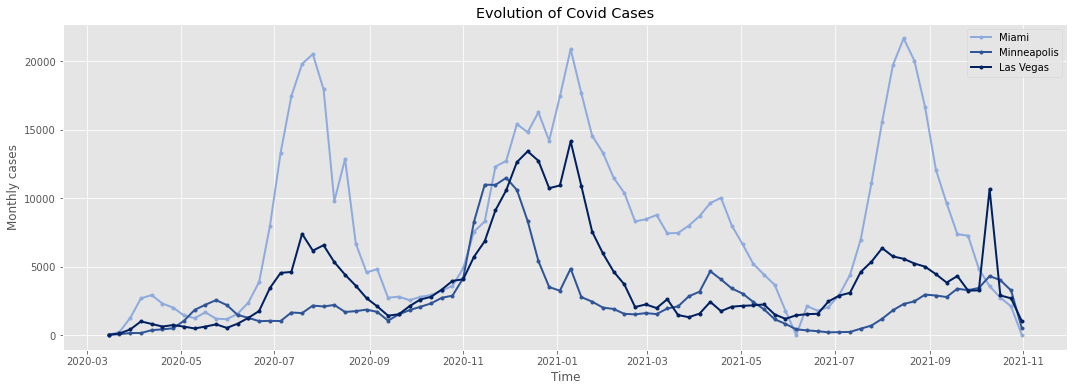

In [143]:
plt.style.use("ggplot")
plt.figure(figsize = (18, 6))
plt.xlabel('Time')
plt.ylabel('Monthly cases')
plt.title('Evolution of Covid Cases')
plt.plot(a["date"], c["cases"], color="#8FAADC", marker=".", linewidth="2", label='Miami')
plt.plot(a["date"], b["cases"], color="#2F5597", marker=".", linewidth="2", label='Minneapolis')
plt.plot(a["date"], a["cases"], color="#002060", marker=".", linewidth="2", label='Las Vegas')
plt.legend()
plt.show()